# Анализ закономерностей успешности игр

# Описание проекта

Имеются из открытых источников исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года.

**Цель проекта:** Необходимо спрогнозировать продажи на 2017 год.

**Задачи:**
- открыть файл с данными и изучить общую информацию;
- подготовить данные;
- провести исследовательский анализ;
- составить портрет пользователя каждого региона;
- проверить гипотезы;
- сделать общий вывод.

С самого начала импортируем все необъодимые библиотеки и модули.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Шаг 1. Открытие файл с данными и изучение общей информации

Имеется файл games.csv, находящийся по адресу: /datasets/games.csv.  
Прочитаем его в переменную data и выведем первые 5 строк.

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Видим, что данные прочитались и разделились на столбцы, то есть в games.csv не было особых разделителей.  
Выведем общую информацию.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 16715 entries, 0 to 16714

Data columns (total 11 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   Name             16713 non-null  object 

 1   Platform         16715 non-null  object 

 2   Year_of_Release  16446 non-null  float64

 3   Genre            16713 non-null  object 

 4   NA_sales         16715 non-null  float64

 5   EU_sales         16715 non-null  float64

 6   JP_sales         16715 non-null  float64

 7   Other_sales      16715 non-null  float64

 8   Critic_Score     8137 non-null   float64

 9   User_Score       10014 non-null  object 

 10  Rating           9949 non-null   object 

dtypes: float64(6), object(5)

memory usage: 1.4+ MB


Видим 16715 строк, большинство из них заполнены полностью. Также видим 11 столбцов:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 2. Подготовка данных

### Приведение названий столбцов к нижнему регистру

Согласно заданию, приведем названия столбцов к нижнему регистру.

In [4]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 16715 entries, 0 to 16714

Data columns (total 11 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   name             16713 non-null  object 

 1   platform         16715 non-null  object 

 2   year_of_release  16446 non-null  float64

 3   genre            16713 non-null  object 

 4   na_sales         16715 non-null  float64

 5   eu_sales         16715 non-null  float64

 6   jp_sales         16715 non-null  float64

 7   other_sales      16715 non-null  float64

 8   critic_score     8137 non-null   float64

 9   user_score       10014 non-null  object 

 10  rating           9949 non-null   object 

dtypes: float64(6), object(5)

memory usage: 1.4+ MB


Видим, что названия столбцов теперь все со строчными буквами.

### Обработка пропусков

Рассмотрим каждый столбец с пропущенными значениями.

**Столбец name**  
По общей информации видим, что в данном столбце 2 пропуска. По остальным данным достоверно определить пропущенные имена не получится, поэтому исключим данные строки.

**Столбец year_of_release**  
По общей информации видим, что в данном столбце 269 пропусков. По остальным данным достоверно определить пропущенные значения также не получится, а искать 269 игр в интернете с целью заполнить пропуски - долго и нецелесообразно, так как пропущенных значений всего 1.6% от общего числа строк. Поэтому исключим данные строки.

**Столбец genre**  
В столбце видим 2 пропуска. Возможно, данные пропуски находятся в строках, которые мы собираемся исключить по вышеописанным столбцам. Если исключения строк в данном столбце останутся пропуски, то их можо будет нати в интернете по имени игры и заполнить вручную.

In [5]:
data = data.dropna(subset=['name', 'year_of_release'])
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 16444 entries, 0 to 16714

Data columns (total 11 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   name             16444 non-null  object 

 1   platform         16444 non-null  object 

 2   year_of_release  16444 non-null  float64

 3   genre            16444 non-null  object 

 4   na_sales         16444 non-null  float64

 5   eu_sales         16444 non-null  float64

 6   jp_sales         16444 non-null  float64

 7   other_sales      16444 non-null  float64

 8   critic_score     7983 non-null   float64

 9   user_score       9839 non-null   object 

 10  rating           9768 non-null   object 

dtypes: float64(6), object(5)

memory usage: 1.5+ MB


Как и предполагалось, пропуски в столбце genre были в исключаемых строках.

Пропуски в столбцах name, year_of_release и genre могли произойти по причине ошибок в чтении/записи данных при работе с базой данных, при парсинге, или человеческий фактор.

Видим, что с пропусками остались столбцы critic_score, user_score и rating. Причем пропусков - 51.4%, 40.2% и 40.6% соответственно, что слишком много для исключения строк из данных. Поэтому оставим данные пропуски как есть. Пропуски в данных столбцах могли произойти по вышеописанным причинам, а также по причине того, что для некоторых игр оценки не проводились и рейтинг не составлялся.

### Обработка неявных дубликатов

Рассмотрим каждый столбец, где гипотетически могут быть неявные дубликаты.

**Стобец name**  
Рассмотрим количество уникальных значений и сами уникальные значения данного столбца.

In [6]:
print('Количество уникальных значений:', data['name'].nunique())
print(sorted(data['name'].unique()))

Количество уникальных значений: 11426

[' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest", ' Haikyu!! Cross Team Match!', ' Tales of Xillia 2', "'98 Koshien", '.hack//G.U. Vol.1//Rebirth', '.hack//G.U. Vol.2//Reminisce', '.hack//G.U. Vol.2//Reminisce (jp sales)', '.hack//G.U. Vol.3//Redemption', '.hack//Infection Part 1', '.hack//Link', '.hack//Mutation Part 2', '.hack//Outbreak Part 3', '.hack//Quarantine Part 4: The Final Chapter', '.hack: Sekai no Mukou ni + Versus', '007 Racing', '007: Quantum of Solace', '007: The World is not Enough', '007: Tomorrow Never Dies', '1 vs. 100', '1/2 Summer +', '10 Minute Solution', '100 All-Time Favorites', '100 Classic Books', '100 Classic Games', '1000 Cooking Recipes from ELLE à table', '1001 Touch Games', '101-in-1 Explosive Megamix', '101-in-1 Party Megamix Wii', '101-in-1 Sports Megamix', '101-in-1 Sports Party Megamix', '1080°: TenEighty Snowboarding', '11eyes: CrossOver', '12-Sai. Honto no Kimochi', '12-Sai. Koisuru Diary', '1

In [7]:
# код ревьюера
sorted(data['name'].unique())

[' Beyblade Burst',
 ' Fire Emblem Fates',
 " Frozen: Olaf's Quest",
 ' Haikyu!! Cross Team Match!',
 ' Tales of Xillia 2',
 "'98 Koshien",
 '.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '.hack//Infection Part 1',
 '.hack//Link',
 '.hack//Mutation Part 2',
 '.hack//Outbreak Part 3',
 '.hack//Quarantine Part 4: The Final Chapter',
 '.hack: Sekai no Mukou ni + Versus',
 '007 Racing',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '1 vs. 100',
 '1/2 Summer +',
 '10 Minute Solution',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '1000 Cooking Recipes from ELLE à table',
 '1001 Touch Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party Megamix Wii',
 '101-in-1 Sports Megamix',
 '101-in-1 Sports Party Megamix',
 '1080°: TenEighty Snowboarding',
 '11eyes: CrossOver',
 '12-Sai. Honto no Kimochi',
 '12-Sai. Koisuru Diary',
 '12Ri

Среди 11426 значений найти неявные дубликаты крайне непросто, особенно, когда значения записаны таким образом, как в нашем случае. Будем считать, что неявные дубликаты в данном столбце отсутствуют.

**Стобец platform**  
Рассмотрим количество уникальных значений и сами уникальные значения данного столбца.

In [8]:
print('Количество уникальных значений:', data['platform'].nunique())
print(sorted(data['platform'].unique()))

Количество уникальных значений: 31

['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']


Неявных дубликатов не наблюдаем.

Хотя 'PS', 'PS2', 'PS3', 'PS4', и 'PSV' можно было бы объединить в 'PS', как и 'X360', 'XB' и 'XOne' объединить в 'XB', но это было бы не совсем корректно, так как это платформы разных поколений и разной архитектуры (возможно). Соответственно, стоит рассматривать их как отдельные платформы.

**Стобец genre**  
Рассмотрим количество уникальных значений и сами уникальные значения данного столбца.

In [9]:
print('Количество уникальных значений:', data['genre'].nunique())
print(sorted(data['genre'].unique()))

Количество уникальных значений: 12

['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']


Неявные дубликаты отсутствуют.

**Стобец user_score**  
По заданию на данный столбец необходимо обратить особое внимание. Рассмотрим количество уникальных значений и сами уникальные значения данного столбца.

In [10]:
print('Количество уникальных значений:', data['user_score'].nunique())
print(data['user_score'].unique())

Количество уникальных значений: 96

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'

 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'

 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'

 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'

 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'

 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'

 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'

 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Наблюдаем аббревиатуру 'tbd', что означает To Be Determined, то есть будет определено. Так как оценка еще не определена, будем считать, что ее нет, то есть заменим 'tbd' на nan.

In [11]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
print(data['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'

 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'

 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'

 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'

 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'

 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'

 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'

 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


'tbd' заменен на nan.

### Обработка явных дубликатов

**Явные дубликаты по всем столбцам**

Проверим датафрейм на наличие явных дубликатов по всем столбцам.

In [12]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


Явные дубликаты по всем столбцам отсутствуют.

**Дубликаты по столбцам name, platform и year_of_release одновременно**

Посмотрим, сколько дубликатов, совпадающие по названию, платформе и году релиза одновременно.

In [13]:
print('Количество дубликатов:', data.duplicated(subset=('name', 'platform', 'year_of_release')).sum())

Количество дубликатов: 1


Таким образом дублируется всего одна строка. Исключим ее, проверим еще раз, чтобы убедиться, что все работает, и выведем оставшееся количество строк.

In [14]:
data = data.drop_duplicates(subset=('name', 'platform', 'year_of_release'))
print('Количесво строк в data стало:', data.shape[0])
print('Количество дубликатов:', data.duplicated(subset=('name', 'platform', 'year_of_release')).sum())

Количесво строк в data стало: 16443

Количество дубликатов: 0


Итого получаем 16443 строки из 16715 изначальных, что значит было исключено 1.6% строк.

### Преобразование данных в нужный тип

Рассмотрим каждый столбец поотдельности:
- name - тип данных object, что подходит для описания текстовых значений названий игр;
- platform - тип данных object, что подходит для описания текстовых значений названий платформ;
- year_of_release - тип данных float64, что подходит для описания года выпуска. **Однако, в дальнейшем будет необходимо использовать данные значения для визуализации, и лучше было бы, чтобы значения были целыми, поэтому заменим тип данных на int;**
- genre - тип данных object, что подходит для описания текстовых значений названий жанра;
- na_sales, eu_sales, jp_sales, other_sales - тип данных float64, что подходит для описания количества продаж, так как продажи считаются в миллионах копий и необходимы вещественные числа;
- critic_score - тип данных float64, что подходит для описания оценки от 0 до 100. Если бы были трудности с количеством памяти, можно было бы заменить на int, так как в данном столбце только целые числа;
- user_score - тип данных object, так как в иходных данных было значение 'tbd', которое было заменено на nan. **Соответственно, в данном столбце больше подойдет тип данных float64, так как описываются оценки от 1 до 10 с точностью 1 знак после точки;**
- rating' - тип данных object, что подходит для описания текстовых значений рейтинга.

In [15]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 16443 entries, 0 to 16714

Data columns (total 11 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   name             16443 non-null  object 

 1   platform         16443 non-null  object 

 2   year_of_release  16443 non-null  int64  

 3   genre            16443 non-null  object 

 4   na_sales         16443 non-null  float64

 5   eu_sales         16443 non-null  float64

 6   jp_sales         16443 non-null  float64

 7   other_sales      16443 non-null  float64

 8   critic_score     7982 non-null   float64

 9   user_score       7462 non-null   float64

 10  rating           9767 non-null   object 

dtypes: float64(6), int64(1), object(4)

memory usage: 1.5+ MB


Данные преобразованы в нужный тип.

### Подсчет суммарных продаж

Посчитаем суммарные продажи во всех регионах для каждой игры и добавим в новый столбец total_sales.

In [16]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Столбец с суммарными продажами добавлен.

**Промежуточный итог:**

На этапе предобработки было сделано:
- названия столбцов приведены к нижнему регистру;
- исключены пропуски, незначительно влияющие на основную совокупность данных;
- исключены явыные и неявные дубликаты;
- преобразываны типы данных стоблбцов на более подходящие;
- добавлен столбец с суммарными продажами.

## Шаг 3. Исследовательский анализ данных

### Задание: исследовать, сколько игр выпускалось каждый год.

Определить, важны ли данные за все периоды.

Создадим сводную таблицу по количеству релизов, распределенным по годам. Затем построим график распределения количества релизов от года.

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0.5, 0, 'Год выпуска')

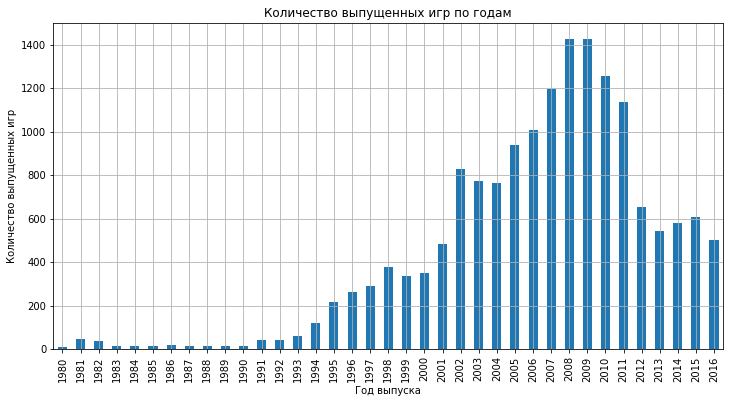

In [17]:
games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
display(games_per_year)
temp_data_gpy = games_per_year.plot(kind='bar',
                                    figsize=(12, 6), 
                                    grid=True, 
                                    title=('Количество выпущенных игр по годам'), 
                                    legend=False)
temp_data_gpy.set_ylabel('Количество выпущенных игр')
temp_data_gpy.set_xlabel('Год выпуска')

Видим, что количество выпущенных игр постепенно росло примерно с начала 90-х, скорее всего ввиду развития технологий, позволяющих создавать новые платформы, а так же развития и увеличения мощностей "железа". Ввиду этого, рынок начал развиваться вплоть до конца "нулевых", после чего видим спад в 2 раза, что можно объяснить конкуренцией, из-за которой производство игр на некоторых несильно распространенных платформах стало нерентабельным.

Тогда для прогнозирования на 2017 год логично взять интервал от 2012 до 2016 года включительно, так как на данном интервале видим отностильно стабильные показания количества выпущенных игр, а следовательно факторы развития технологий в прошлом не должны исказить прогноз.

### Задание: исследовать, как менялись продажи по платформам.

Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Определить, за какой характерный срок появляются новые и исчезают старые платформы.

Построим сводную таблицу по общему количеству продаж, распределенным по платформам.

In [18]:
platform_total_sales = data.pivot_table(index='platform', 
                                        values='total_sales', 
                                        aggfunc='sum').sort_values(by='total_sales', 
                                                                   ascending=False)
display(platform_total_sales)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Видим, что у PS отрыв от PS4 почти в два раза. Поэтому будем считать, что платформы с наибольшими суммарными продажами - первые 6 платформ из сводной таблицы.

Построим сводную таблицу по суммартым продажам, распределенным по платформам и годам. Затем построим графики суммарных продаж на каждую платформу по годам. Сначала для PS2.

Text(0.5, 0, 'Год выпуска игр')

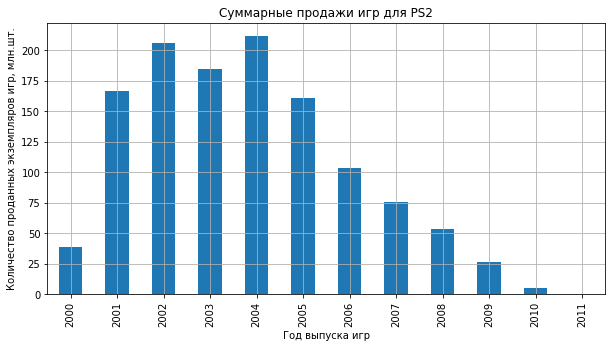

In [19]:
# Сводная таблица
platform_total_sales_per_year = data.pivot_table(index=('year_of_release', 'platform'), 
                                        values='total_sales', 
                                        aggfunc='sum').reset_index()
# График продаж для PS2
temp_data_ps2 = platform_total_sales_per_year[platform_total_sales_per_year['platform']=='PS2'].plot(
    x='year_of_release',
    y='total_sales', 
    legend=False,
    kind='bar',
    figsize=(10, 5),
    grid=True,
    title=('Суммарные продажи игр для PS2')
)
temp_data_ps2.set_ylabel('Количество проданных экземпляров игр, млн.шт.')
temp_data_ps2.set_xlabel('Год выпуска игр')

Видим, что продажи на платформу PS2 начались в 2000 году, а закончились в 2010. То есть фактически платформа просуществовала 11 лет.

Построим график для X360.

Text(0.5, 0, 'Год выпуска игр')

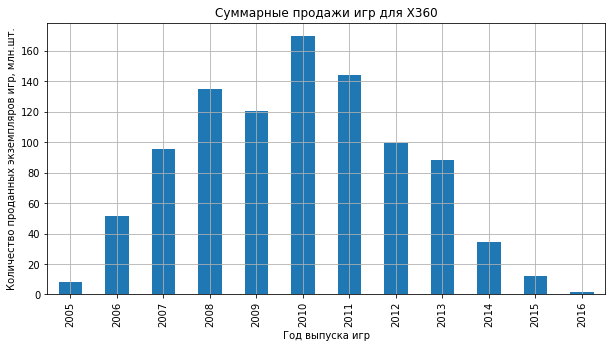

In [20]:
# График продаж для X360
temp_data_x360 = platform_total_sales_per_year[platform_total_sales_per_year['platform']=='X360'].plot(
    x='year_of_release',
    y='total_sales', 
    legend=False,
    kind='bar',
    figsize=(10, 5),
    grid=True,
    title=('Суммарные продажи игр для X360')
)
temp_data_x360.set_ylabel('Количество проданных экземпляров игр, млн.шт.')
temp_data_x360.set_xlabel('Год выпуска игр')

Видим, что продажи на платформу X360 начались в 2005 году, а закончились, будем считать, в 2016 (судя по тенденции графика). То есть фактически платформа просуществовала 12 лет.

Построим график для PS3.

Text(0.5, 0, 'Год выпуска игр')

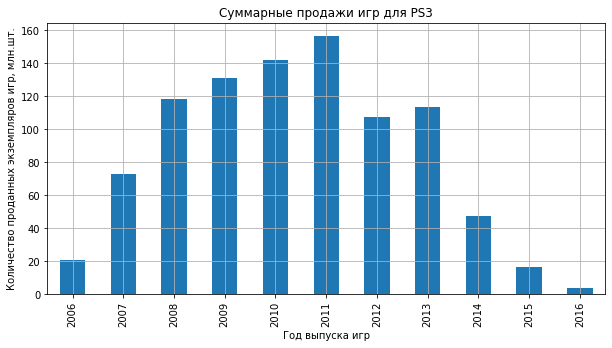

In [21]:
# График продаж для PS3
temp_data_ps3 = platform_total_sales_per_year[platform_total_sales_per_year['platform']=='PS3'].plot(
    x='year_of_release',
    y='total_sales', 
    legend=False,
    kind='bar',
    figsize=(10, 5),
    grid=True,
    title=('Суммарные продажи игр для PS3')
)
temp_data_ps3.set_ylabel('Количество проданных экземпляров игр, млн.шт.')
temp_data_ps3.set_xlabel('Год выпуска игр')

Видим, что продажи на платформу PS3 начались в 2006 году, а закончились, будем считать, в 2016 (судя по тенденции графика). То есть фактически платформа просуществовала 11 лет.

Построим график для Wii.

Text(0.5, 0, 'Год выпуска игр')

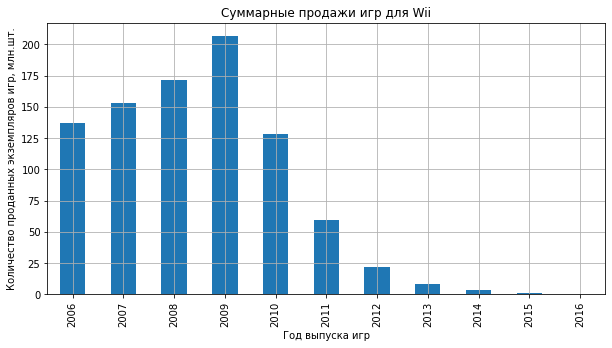

In [22]:
# График продаж для Wii
temp_data_wii = platform_total_sales_per_year[platform_total_sales_per_year['platform']=='Wii'].plot(
    x='year_of_release',
    y='total_sales', 
    legend=False,
    kind='bar',
    figsize=(10, 5),
    grid=True,
    title=('Суммарные продажи игр для Wii')
)
temp_data_wii.set_ylabel('Количество проданных экземпляров игр, млн.шт.')
temp_data_wii.set_xlabel('Год выпуска игр')

Видим, что продажи на платформу Wii начались в 2006 году, а закончились в 2015. То есть фактически платформа просуществовала 10 лет.

Построим график для DS.

Text(0.5, 0, 'Год выпуска игр')

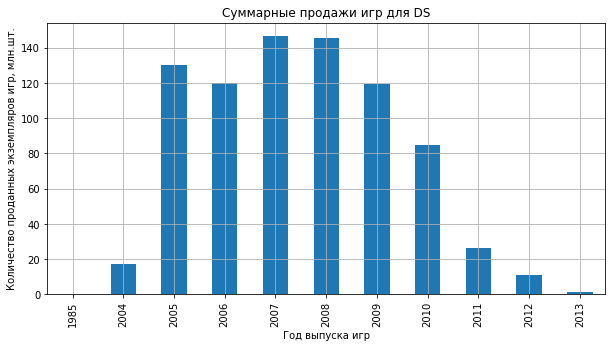

In [23]:
# График продаж для DS
temp_data_ds = platform_total_sales_per_year[platform_total_sales_per_year['platform']=='DS'].plot(
    x='year_of_release',
    y='total_sales', 
    legend=False,
    kind='bar',
    figsize=(10, 5),
    grid=True,
    title=('Суммарные продажи игр для DS')
)
temp_data_ds.set_ylabel('Количество проданных экземпляров игр, млн.шт.')
temp_data_ds.set_xlabel('Год выпуска игр')

Видим, что продажи на платформу DS начались в 2004 году, а закончились в 2013. То есть фактически платформа просуществовала 10 лет. Так же видим какую-то продажу в 1985 году, что можно списать на ошибку, так как Nintendo DS была выпущена в 2004 году согласно Википедии.

Построим график для PS.

Text(0.5, 0, 'Год выпуска игр')

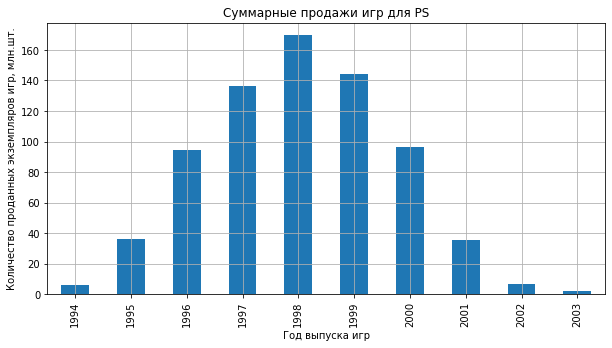

In [24]:
# График продаж для PS
temp_data_ps = platform_total_sales_per_year[platform_total_sales_per_year['platform']=='PS'].plot(
    x='year_of_release',
    y='total_sales', 
    legend=False,
    kind='bar',
    figsize=(10, 5),
    grid=True,
    title=('Суммарные продажи игр для PS')
)
temp_data_ps.set_ylabel('Количество проданных экземпляров игр, млн.шт.')
temp_data_ps.set_xlabel('Год выпуска игр')

Видим, что продажи на платформу PS начались в 1994 году, а закончились в 2003. То есть фактически платформа просуществовала 10 лет.

Из построенных графиков можно сделать вывод, что в среднем платформы появляются и исчезают за 10-12 лет.

Построим такой же график для персональных компьютеров PC.

Text(0.5, 0, 'Год выпуска игр')

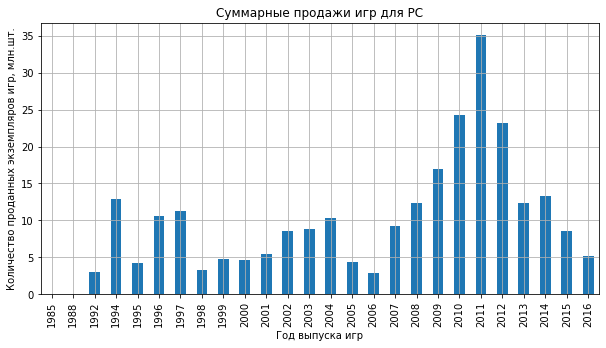

In [25]:
# График продаж для PC
temp_data_pc = platform_total_sales_per_year[platform_total_sales_per_year['platform']=='PC'].plot(
    x='year_of_release',
    y='total_sales', 
    legend=False,
    kind='bar',
    figsize=(10, 5),
    grid=True,
    title=('Суммарные продажи игр для PC')
)
temp_data_pc.set_ylabel('Количество проданных экземпляров игр, млн.шт.')
temp_data_pc.set_xlabel('Год выпуска игр')

Персональные копьютеры изначально не создавались как игровые платформы, что не помешало людям выпустить на них игры. Это обуславливает, что игры на PC выпускались с 1992 года до конца наблюдаемого интервала, и как мы знаем, выпускаются до сих пор.

### Задача: определить, какие платформы лидируют по продажам, растут или падают.

Необходимо выбрать несколько потенциально прибыльных платформ, руководствуясь данными за **актуальный период**.

За актуальный период был принят в п. 3.1 период от 2012 до 2016 года включительно. Выделим данные за актуальный период в отдельную переменную current_data.

In [26]:
current_data = data[(2012<=data['year_of_release'])&(data['year_of_release']<=2016)]
print(sorted(current_data['year_of_release'].unique()))

[2012, 2013, 2014, 2015, 2016]


Уникальные значения нового датафрейма по столбцу year_of_release соответстуют актуальному периоду. Из пункта 3.2 видим, что чаще всего график продаж у платформ сначала возрастает, затем убывает до до самого исчезновения платформы. Соответственно, построив графики по продажам за актуальный период для каждой платформы, можно попытаться определить на каком этапе жизни находится платформа, а затем выбрать платформы с высоким объемом продаж и возрастающим или несильно убывающим графиком.

Посмотрим какие платформы еще живы в выбранном периоде.

In [27]:
print(current_data['platform'].unique())

['PS3' 'X360' 'PS4' '3DS' 'DS' 'XOne' 'WiiU' 'Wii' 'PC' 'PSV' 'PSP']


Построим графики для каждой платформы.

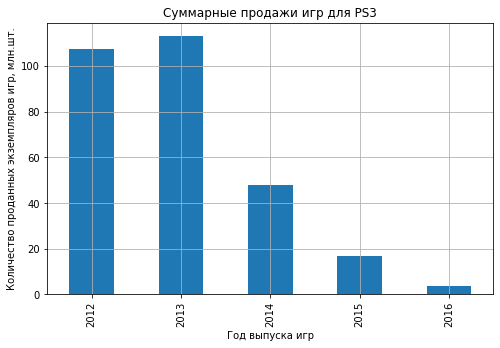

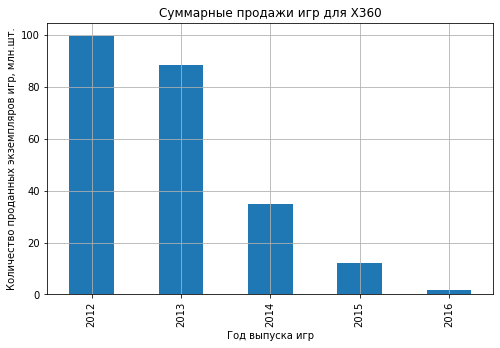

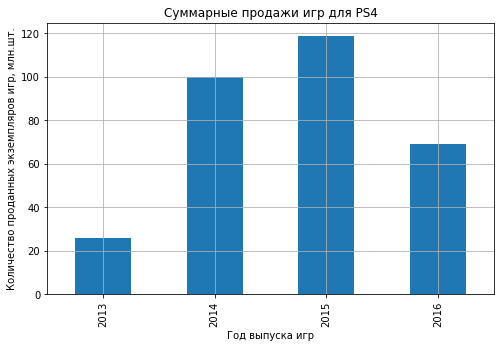

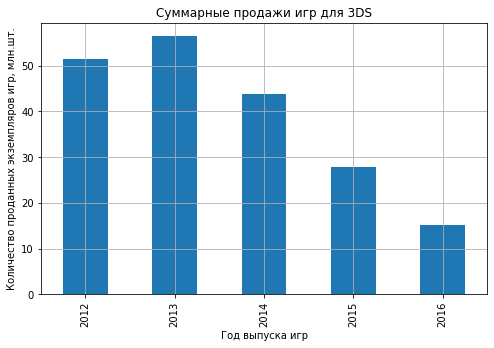

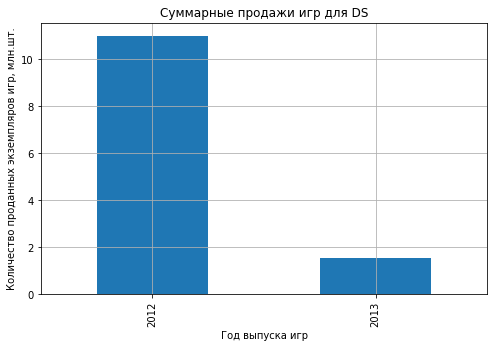

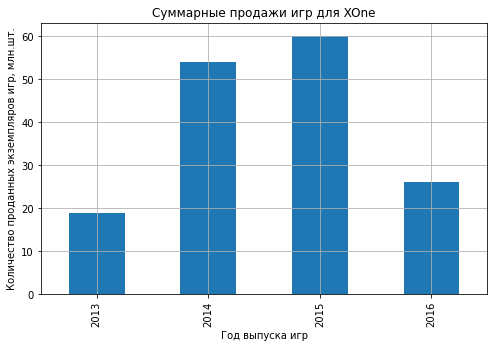

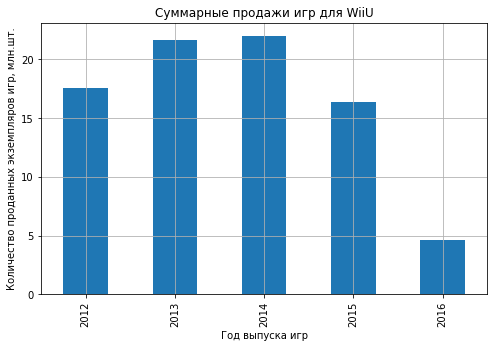

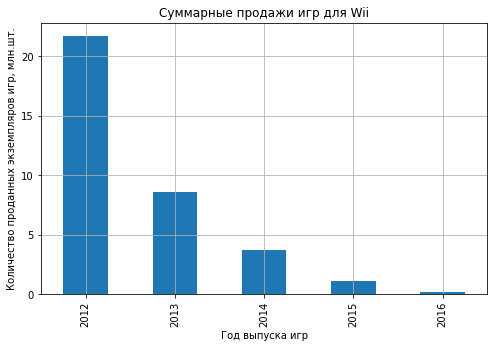

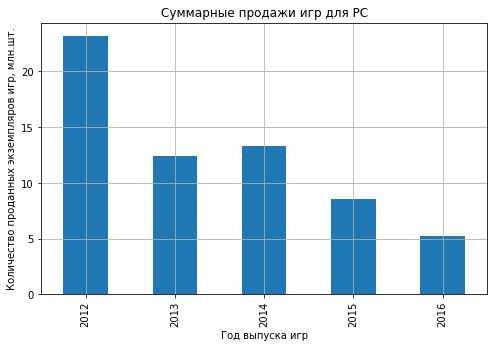

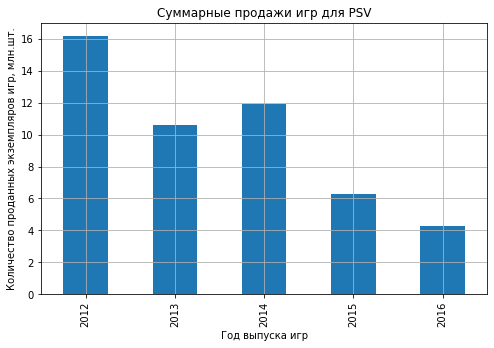

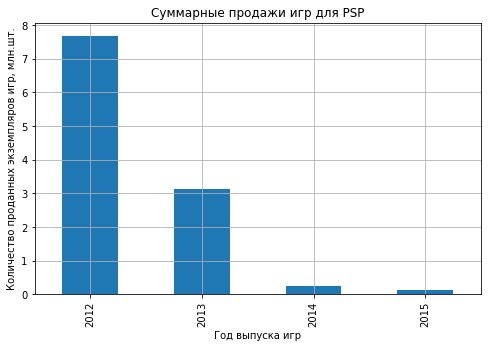

In [28]:
# Сводная таблица суммарных продаж по платформам и года за актуальный период
platform_current_total_sales = current_data.pivot_table(index=('year_of_release', 'platform'), 
                                                        values='total_sales', 
                                                        aggfunc='sum').reset_index()

# Функция для построения графика
def sales_plot(platform):
    temp_data = platform_current_total_sales[platform_current_total_sales['platform']==platform].plot(
        x='year_of_release',
        y='total_sales', 
        legend=False,
        kind='bar',
        figsize=(8, 5),
        grid=True,
        title=(f'Суммарные продажи игр для {platform}')
    )
    temp_data.set_ylabel('Количество проданных экземпляров игр, млн.шт.')
    temp_data.set_xlabel('Год выпуска игр')

# Вызов функции по именам платформ
for i in current_data['platform'].unique():
    sales_plot(i)

Имеем следующее:
- DS - исчезла;
- PS3, X360, Wii, PSP - почти исчезли, их графики сильно упали;
- 3DS, WiiU, PSV - еще имеют какоей-то объем продаж, но видно, что графики падают;
- PS4, XOne - продажи начались в 2013 году, графики стремительно растут, корме 2016 года. Возможно, данные за 2016 год не полные. Предположительно, данные платформы просуществуют до 2022-2024 годов и являются наиболее;
- PC - имеет затухающий график, но как мы видели ранее, персональные компьютеры - изначально не игровая платформа, соответственно, будет сущещствовать еще очень долго, так как даже те же игровые платформы программируются PC, неговоря уже о самих играх. Однако, видим, что объем продаж на PC не такой уж большой, по сравнению с PS4 и XOne, то есть можно расчитывать на наличие продаж, но не на их большой объем.

Вывод: самыми потенциально прибыльными платформами являюся PS4 и XOne.

### Задание: построить график "ящик с усами" по глобальным продажам игр в разбивке по платформам

Среди платформ будем рассматривать выбранные ранее PS4 и XOne. Соответствено, имеет смысл выделить актуальные данные по данным платформам в отдельные переменные.

Text(0, 0.5, 'Глобальные продажи, млн.шт.')

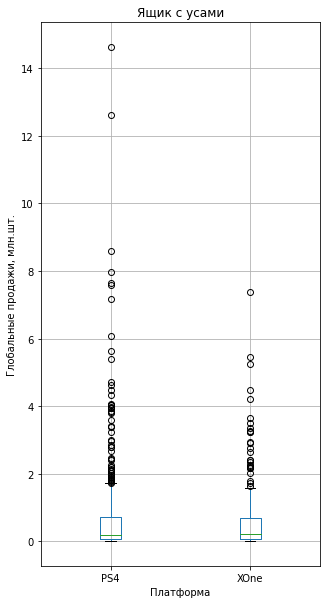

In [29]:
# Данные по PS4 и XOne за актуальный период
current_platform_data = current_data[(current_data['platform']=='PS4')|(current_data['platform']=='XOne')]

# Сводная таблица по глобальным продажам игр в разбивке по платформам
current_platform_sales = current_platform_data.pivot_table(index='name', 
                                                           columns='platform', 
                                                           values='total_sales', 
                                                           aggfunc='sum')

# Построение графика
current_platform_sales.boxplot(figsize=(5, 10))
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи, млн.шт.')

Уменьшим диапазон на графике, чтобы получше рассмотреть "ящик".

Text(0, 0.5, 'Глобальные продажи, млн.шт.')

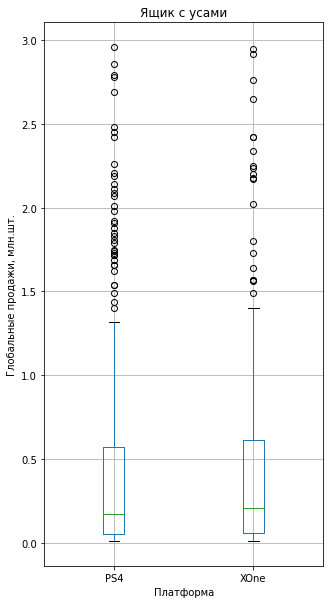

In [30]:
# Сводная таблица по глобальным продажам игр в разбивке по платформам
current_platform_sales = current_platform_data.pivot_table(index='name', 
                                                           columns='platform', 
                                                           values='total_sales',
                                                           aggfunc='sum')

# Построение графика
current_platform_sales[current_platform_sales<=3].boxplot(figsize=(5, 10))
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи, млн.шт.')

Наблюдаем примерно одинаковые "ящики и усы", то есть в общем глобальные продажи игр по данным платформам примерно равны и распределены примерно одинаково. Однако, если посмотреть на выбросы, то видим, что у PS4 преимущество (какая-то игра продалась даже тиражом около 15 млн. копий).

### Задание: определить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Необходимо построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Создадим сводную таблицу с отзывами критиков, пользователей и глобальными продажами.

In [31]:
# Сводная таблица за актуальный период с отзывами критиков, пользователей и глобальными продажами
current_score = current_data.pivot_table(index='name', 
                                          columns='platform', 
                                          values=('critic_score', 'user_score', 'total_sales'), 
                                          aggfunc='sum').reset_index()
display(current_score)

name critic_score       \
platform                                                         3DS   DS   
0                                        Beyblade Burst          0.0  NaN   
1                                     Fire Emblem Fates          0.0  NaN   
2                                  Frozen: Olaf's Quest          0.0  0.0   
3                            Haikyu!! Cross Team Match!          0.0  NaN   
4                                     Tales of Xillia 2          NaN  NaN   
...                                                 ...          ...  ...   
1666                         Zumba Fitness: World Party          NaN  NaN   
1667      Zyuden Sentai Kyoryuger: Game de Gaburincho!!          0.0  NaN   
1668                                      [Prototype 2]          NaN  NaN   
1669                        htoL#NiQ: The Firefly Diary          NaN  NaN   
1670                               inFAMOUS: Second Son          NaN  NaN   

                                                ... user_score                 \
platform    PC   PS3   PS4 PSP   PSV  Wii WiiU  ...         DS   PC  PS3  PS4   
0          NaN   NaN   NaN NaN   NaN  NaN  NaN  ...        NaN  NaN  NaN  NaN   
1          NaN   NaN   NaN NaN   NaN  NaN  NaN  ...        NaN  NaN  NaN  NaN   
2          NaN   NaN   NaN NaN   NaN  NaN  NaN  ...        0.0  NaN  NaN  NaN   
3          NaN   NaN   NaN NaN   NaN  NaN  NaN  ...        NaN  NaN  NaN  NaN   
4          NaN  71.0   NaN NaN   NaN  NaN  NaN  ...        NaN  NaN  7.9  NaN   
...        ...   ...   ...  ..   ...  ...  ...  ...        ...  ...  ...  ...   
1666       NaN   NaN   NaN NaN   NaN  0.0  NaN  ...        NaN  NaN  NaN  NaN   
1667       NaN   NaN   NaN NaN   NaN  NaN  NaN  ...        NaN  NaN  NaN  NaN   
1668      76.0  79.0   NaN NaN   NaN  NaN  NaN  ...        NaN  6.4  6.8  NaN   
1669       NaN   NaN   NaN NaN  58.0  NaN  NaN  ...        NaN  NaN  NaN  NaN   
1670       NaN   NaN  80.0 NaN   NaN  NaN  NaN  ...        NaN  NaN  NaN  7.9   

                                       
platform PSP  PSV  Wii WiiU X360 XOne  
0        NaN  NaN  NaN  NaN  NaN  NaN  
1        NaN  NaN  NaN  NaN  NaN  NaN  
2        NaN  NaN  NaN  NaN  NaN  NaN  
3        NaN  NaN  NaN  NaN  NaN  NaN  
4        NaN  NaN  NaN  NaN  NaN  NaN  
...       ..  ...  ...  ...  ...  ...  
1666     NaN  NaN  0.0  NaN  NaN  6.2  
1667     NaN  NaN  NaN  NaN  NaN  NaN  
1668     NaN  NaN  NaN  NaN  7.0  NaN  
1669     NaN  7.7  NaN  NaN  NaN  NaN  
1670     NaN  NaN  NaN  NaN  NaN  NaN  

[1671 rows x 34 columns]

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

  fig = self.plt.figure(figsize=self.figsize)


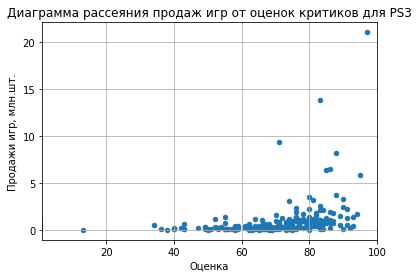

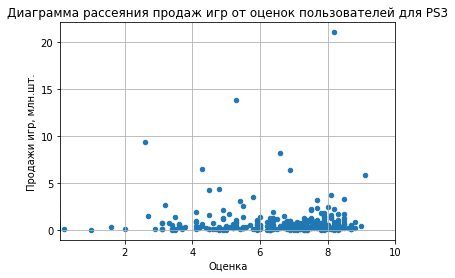

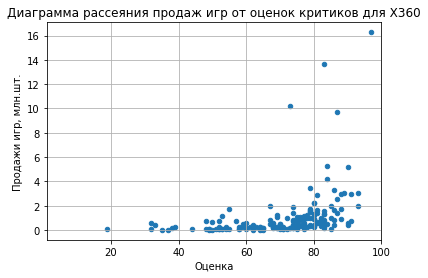

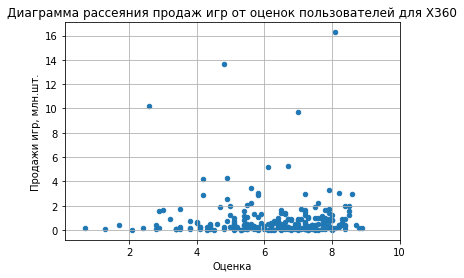

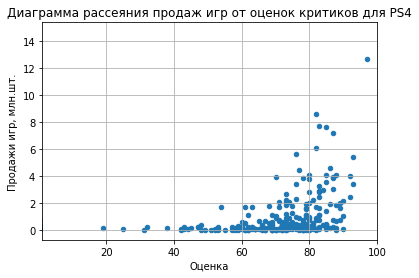

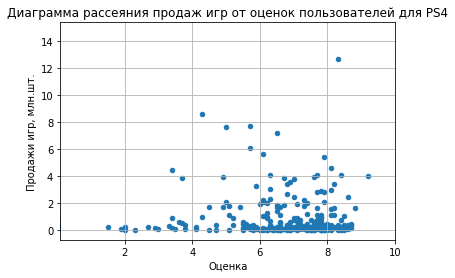

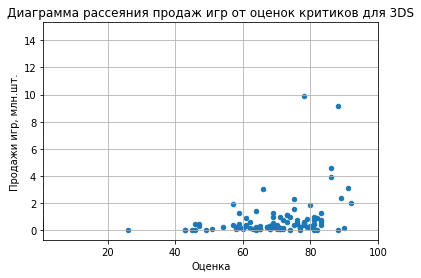

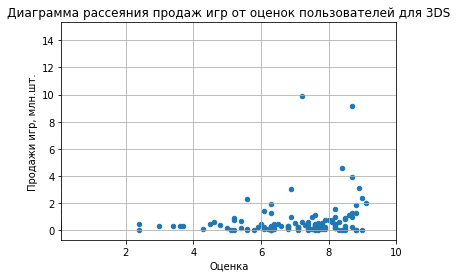

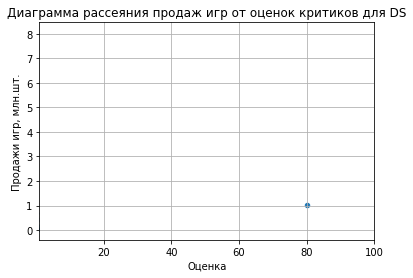

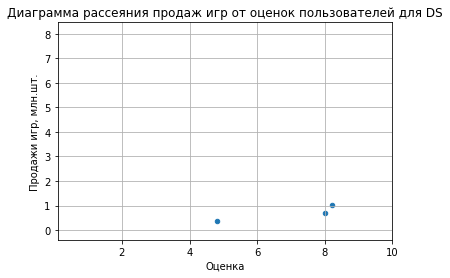

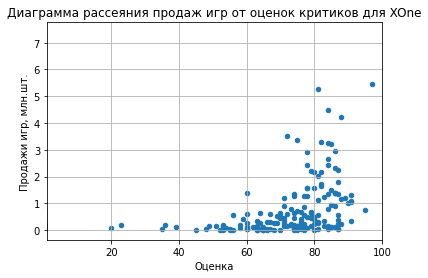

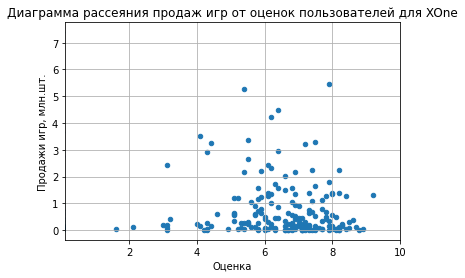

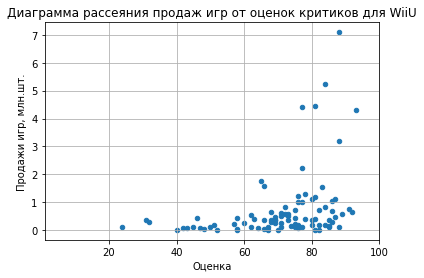

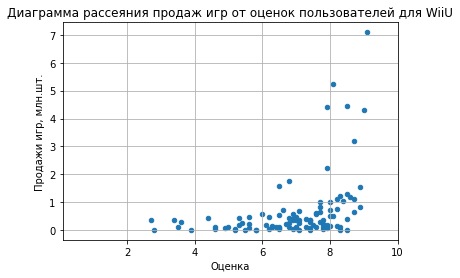

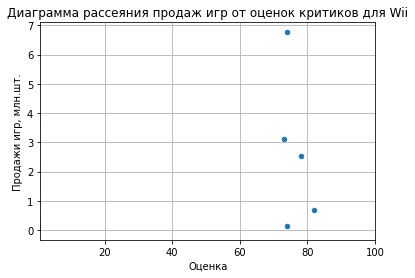

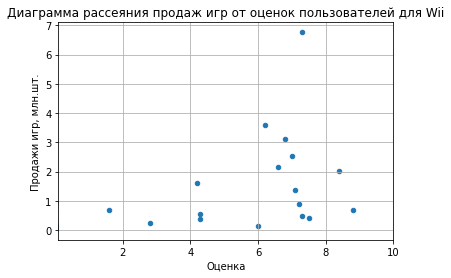

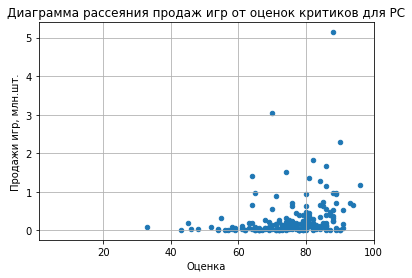

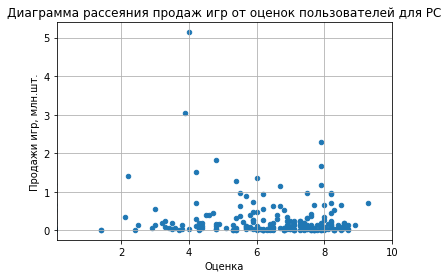

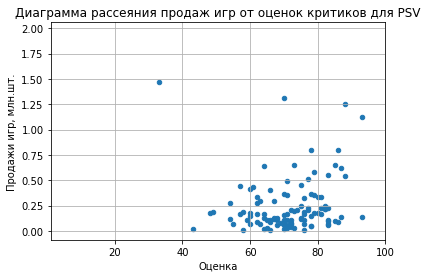

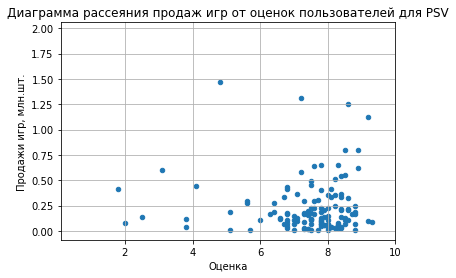

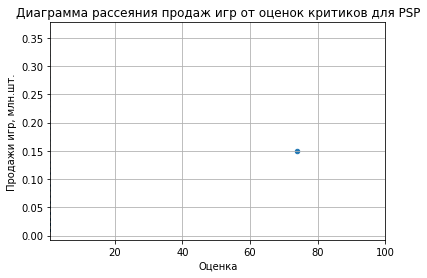

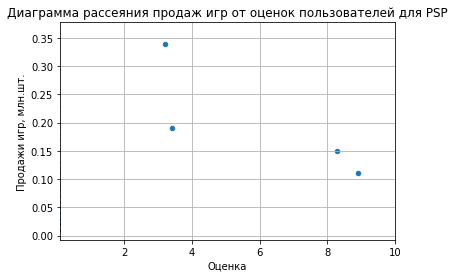

In [32]:
# Функция для построения диаграмм
def score_plots(platform):
    # Диаграмма рассеяния продаж игр от оценок критиков
    current_score.plot(kind='scatter', 
                       x=('critic_score', platform), 
                       y=('total_sales', platform), 
                       figsize=(6, 4),
                       grid=True,
                       title=(f'Диаграмма рассеяния продаж игр от оценок критиков для {platform}'))

    plt.xlim(1, 100)
    plt.xlabel('Оценка')
    plt.ylabel('Продажи игр, млн.шт.')

    # Диаграмма рассеяния продаж игр от оценок пользователей
    current_score.plot(kind='scatter', 
                       x=('user_score', platform), 
                       y=('total_sales', platform), 
                       figsize=(6, 4), 
                       grid=True,
                       title=(f'Диаграмма рассеяния продаж игр от оценок пользователей для {platform}'))
    plt.xlim(0.1, 10)
    plt.xlabel('Оценка')
    plt.ylabel('Продажи игр, млн.шт.')
    
# Перебор платформ и передача в функицю
for i in current_data['platform'].unique():
    score_plots(i)

In [33]:
print('Коэффициент корреляции продаж игр от оценок критиков для:')
for i in current_data['platform'].unique():   
    print(f'{i}:', current_score['critic_score', i].corr(current_score['total_sales', i]))

print('Коэффициент корреляции продаж игр от оценок пользователей для:')
for i in current_data['platform'].unique():       
    print(f'{i}:', current_score['user_score', i].corr(current_score['total_sales', i]))

Коэффициент корреляции продаж игр от оценок критиков для:

PS3: 0.30078277084396504

X360: 0.26202840220219686

PS4: 0.22754960627752677

3DS: 0.15026490592743438

DS: 0.07932569762230188

XOne: 0.2748391874944539

WiiU: 0.29812398749349167

Wii: 0.5381207067838354

PC: 0.20422121304922444

PSV: 0.3950798628951198

PSP: 0.0915096674146309

Коэффициент корреляции продаж игр от оценок пользователей для:

PS3: 0.2141124104428595

X360: 0.09974264797389451

PS4: 0.11311562450852886

3DS: 0.1301557252757391

DS: 0.077245681607332

XOne: 0.11656261405851866

WiiU: 0.2711403191078007

Wii: 0.6168003442757595

PC: 0.04220211566414307

PSV: 0.37303849011040086

PSP: 0.20038020875948778


Если не брать в расчет платформы, где продаж очень мало (DS, Wii, PSP), на графиках и по коэффициентам наблюдаем очень слабую положительную корреляцию. Если смотреть диаграмму рассеяния продаж игр от оценок критиков, то видим, что какая-то корреляция начинает появляться только тогда, когда оценки критиков превышают 50 баллов, но тем не менее, видим множество игр с высокими оценками, но низкими продажами. 

Из чего можно сделать вывод, что продажи игр от оценок критиков и пользователей зависят очень слабо.

### Задание: Рассмотреть общие распределения игр по жанрам

Необходимо найти самые прибыльные жанры и отличия жанров с самыми высокими и самыми низкими продажами. Построим сводную таблицу для выбранных платформ за актуальный период по количеству игр и глобальным продажам, сгруппированным по жанру.

In [34]:
current_genre_data = current_data.pivot_table(index='genre',
                                              values='total_sales',
                                              aggfunc=('count', 'sum')).sort_values(by='count', ascending=False)

display(current_genre_data)

,count,sum
genre,,
Action,1031,441.12
Role-Playing,370,192.80
Adventure,302,29.43
Sports,267,181.06
Shooter,235,304.73
Misc,192,85.04
Racing,115,53.50
Fighting,109,44.49
Platform,85,61.00


Визуализиреуем таблицу

Text(0.5, 0, 'Жанр')

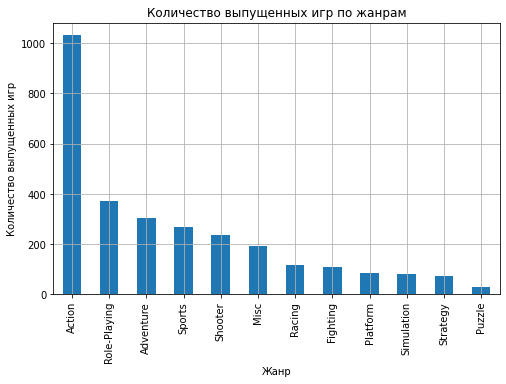

In [35]:
current_genre_data['count'].sort_values(ascending=False).plot(x='genre',
                                                              y='count', 
                                                              legend=False,
                                                              kind='bar',
                                                              figsize=(8, 5),
                                                              grid=True,
                                                              title=('Количество выпущенных игр по жанрам'))
plt.ylabel('Количество выпущенных игр')
plt.xlabel('Жанр')

Text(0.5, 0, 'Жанр')

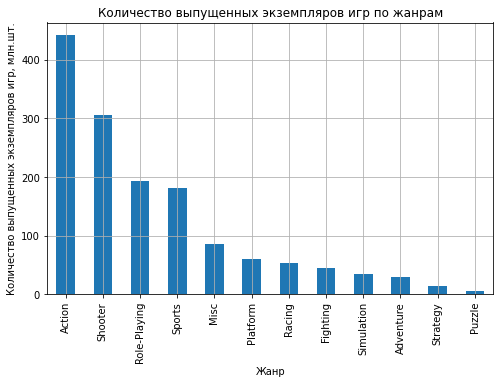

In [36]:
current_genre_data['sum'].sort_values(ascending=False).plot(x='genre',
                                                            y='sum', 
                                                            legend=False,
                                                            kind='bar',
                                                            figsize=(8, 5),
                                                            grid=True,
                                                            title=('Количество выпущенных экземпляров игр по жанрам'))
plt.ylabel('Количество выпущенных экземпляров игр, млн.шт.')
plt.xlabel('Жанр')

Вывод:
- по количеству игр с большим отрывом лидирует жанр Action;
- самые прибыльные жанры с точки зрения проданных копий - Action, Shooter, Role-Playing и Sport (в порядке уменьшения);
- видим, что наибольшей популярностью пользуются игры с предположительно несложным, но динамичным геймплеем.

## Шаг 4. Портрет пользователя региона

### Топ-5 самых популярных платформ регионов (за актуальный период)

Построим сводную таблицу продаж в регионах, сгруппированных по платформам за актуальный период.

In [37]:
region_sales_data = current_data.pivot_table(index='platform', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')
display(region_sales_data)

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.64,87.79,55.31
DS,3.53,3.72,4.59
PC,37.76,0.00,19.12
PS3,106.85,35.29,103.38
PS4,141.09,15.96,108.74
PSP,0.42,10.47,0.13
PSV,11.36,21.04,10.98
Wii,11.92,3.39,17.45
WiiU,25.13,13.01,38.10


Определим топ-5 платформ для каждого региона и построим круговоую диаграмму распределния продаж.

Топ-5 самых популярных платформ в Северной Америке: platform

X360    140.05

PS4     108.74

PS3     103.38

XOne     93.12

3DS      55.31

Name: na_sales, dtype: float64


Text(0, 0.5, '')

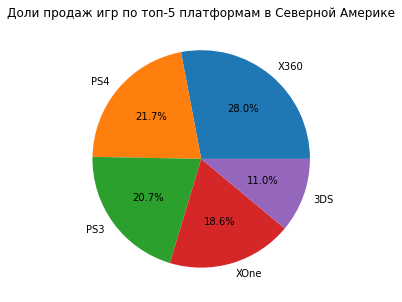

In [38]:
print('Топ-5 самых популярных платформ в Северной Америке:', 
      region_sales_data['na_sales'].sort_values(ascending=False).head())
region_sales_data['na_sales'].sort_values(ascending=False).head().plot(kind='pie', 
                                                                   grid=True, 
                                                                   figsize=(5, 5), 
                                                                   title=('Доли продаж игр по топ-5 платформам в Северной Америке'), 
                                                                   autopct='%.1f%%')
plt.ylabel('')

Топ-5 самых популярных платформ в Европе: platform

PS4     141.09

PS3     106.85

X360     74.52

XOne     51.59

3DS      42.64

Name: eu_sales, dtype: float64


Text(0, 0.5, '')

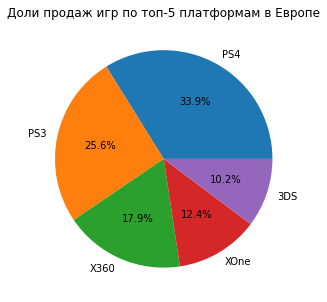

In [39]:
print('Топ-5 самых популярных платформ в Европе:', 
      region_sales_data['eu_sales'].sort_values(ascending=False).head())

region_sales_data['eu_sales'].sort_values(ascending=False).head().plot(kind='pie', 
                                                                   grid=True, 
                                                                   figsize=(5, 5), 
                                                                   title=('Доли продаж игр по топ-5 платформам в Европе'), 
                                                                   autopct='%.1f%%')
plt.ylabel('')

Топ-5 самых популярных платформ в Японии: platform

3DS     87.79

PS3     35.29

PSV     21.04

PS4     15.96

WiiU    13.01

Name: jp_sales, dtype: float64


Text(0, 0.5, '')

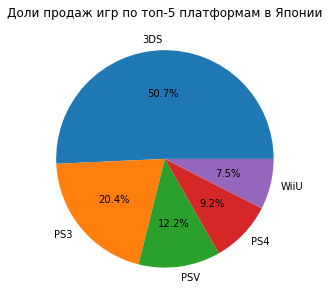

In [40]:
print('Топ-5 самых популярных платформ в Японии:', 
      region_sales_data['jp_sales'].sort_values(ascending=False).head())

region_sales_data['jp_sales'].sort_values(ascending=False).head().plot(kind='pie', 
                                                                   grid=True, 
                                                                   figsize=(5, 5), 
                                                                   title=('Доли продаж игр по топ-5 платформам в Японии'), 
                                                                   autopct='%.1f%%')
plt.ylabel('')

Выводы:
- в Северной Америке примерно в равных долях преоблдают продажи игр на платформы от Microsoft (XBox) и Sony (PlayStation). Однако если смотреть на выбранные в пункте 3.3 платформы, то видим, что продажи PS4 на 17% превосходят XOne;
- в Европе большуя часть занимают платформы от Sony. Видим, что в продажах лидирует платформа PS4, которая занимает чуть больше трети всего рынка. Продажи PS4 на 174% превосходят XOne;
- В Японии половину рынка занимает 3DS, а если рассматривать выбранные в пункте 3.3 платформы, то видим, что XOne вообще не входит в топ-5 продаж.

### Топ-5 самых популярных жанров регионов (за актуальный период)

Построим сводную таблицу продаж в регионах, сгруппированных по жанрам за актуальный период.

In [41]:
region_sales_data = current_data.pivot_table(index='genre', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')
display(region_sales_data)

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.34,52.80,177.84
Adventure,9.46,8.24,8.92
Fighting,10.79,9.44,19.79
Misc,26.32,12.86,38.19
Platform,21.41,8.63,25.38
Puzzle,1.40,2.14,1.13
Racing,27.29,2.50,17.22
Role-Playing,48.53,65.44,64.00
Shooter,113.47,9.23,144.77


Определим топ-5 жанров для каждого региона и построим круговоую диаграмму распределния продаж.

Топ-5 самых популярных жанров в Северной Америки: genre

Action          177.84

Shooter         144.77

Sports           81.53

Role-Playing     64.00

Misc             38.19

Name: na_sales, dtype: float64


Text(0, 0.5, '')

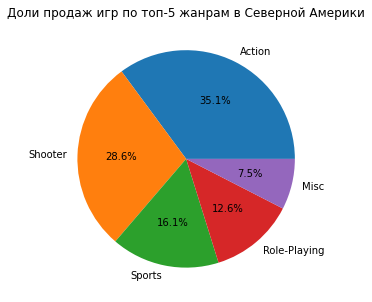

In [42]:
print('Топ-5 самых популярных жанров в Северной Америки:', 
      region_sales_data['na_sales'].sort_values(ascending=False).head())

region_sales_data['na_sales'].sort_values(ascending=False).head().plot(kind='pie', 
                                                                   grid=True, 
                                                                   figsize=(5, 5), 
                                                                   title=('Доли продаж игр по топ-5 жанрам в Северной Америки'), 
                                                                   autopct='%.1f%%')
plt.ylabel('')

Топ-5 самых популярных жанров в Европе: genre

Action          159.34

Shooter         113.47

Sports           69.08

Role-Playing     48.53

Racing           27.29

Name: eu_sales, dtype: float64


Text(0, 0.5, '')

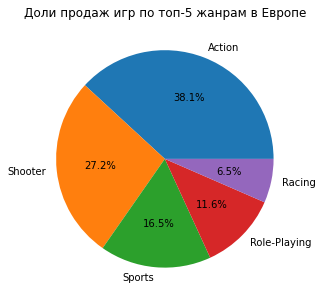

In [43]:
print('Топ-5 самых популярных жанров в Европе:', 
      region_sales_data['eu_sales'].sort_values(ascending=False).head())

region_sales_data['eu_sales'].sort_values(ascending=False).head().plot(kind='pie', 
                                                                   grid=True, 
                                                                   figsize=(5, 5), 
                                                                   title=('Доли продаж игр по топ-5 жанрам в Европе'), 
                                                                   autopct='%.1f%%')
plt.ylabel('')

Топ-5 самых популярных жанров в Японии: genre

Role-Playing    65.44

Action          52.80

Misc            12.86

Simulation      10.41

Fighting         9.44

Name: jp_sales, dtype: float64


Text(0, 0.5, '')

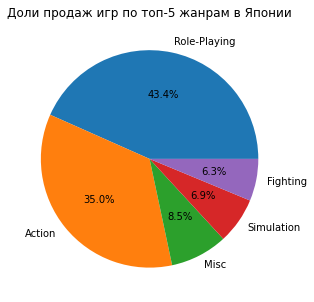

In [44]:
print('Топ-5 самых популярных жанров в Японии:', 
      region_sales_data['jp_sales'].sort_values(ascending=False).head())

region_sales_data['jp_sales'].sort_values(ascending=False).head().plot(kind='pie', 
                                                                   grid=True, 
                                                                   figsize=(5, 5), 
                                                                   title=('Доли продаж игр по топ-5 жанрам в Японии'), 
                                                                   autopct='%.1f%%')
plt.ylabel('')

Выводы:
- в Северной Америке и Европе схожие ситуации - жанры Action, Shooter и Sport занимают большую часть продаж (так же как и для глобального рынка, что было отмечено в п.3.6) и распределены схоже;
- в Японии большую часть продаж занимает Role-Playing, а затем Action. Жанры Shooter и Sport в топ-5 отсутствуют.

Данное различие распределений обусловлено сильным различием между культурой Японии и Европы с Северной америкой.

### Влияние рейтинга ESRB на продажи в регионах

Построим сводную таблицу продаж в регионах, сгруппированных по рейтингу ESRB за актуальный период. Но сначала заменим пустые значения на None, чтобы оценить для скольких игр не было соствалено рейтинга.

In [45]:
# Замена пустых значений на None
current_data['rating'] = current_data['rating'].fillna('None')

# Сводная таблица
rating_data = current_data.pivot_table(index='rating', 
                                       values=('na_sales', 'eu_sales', 'jp_sales'), 
                                       aggfunc='sum').reset_index()
display(rating_data)

/tmp/ipykernel_163/2812012094.py:2: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  current_data['rating'] = current_data['rating'].fillna('None')


,rating,eu_sales,jp_sales,na_sales
0,E,113.02,28.33,114.37
1,E10+,55.37,8.19,75.70
2,M,193.96,21.20,231.57
3,None,91.50,108.84,103.31
4,T,52.96,26.02,66.02


Построим графики для каждого региона.

Text(0.5, 0, 'Рейтинг')

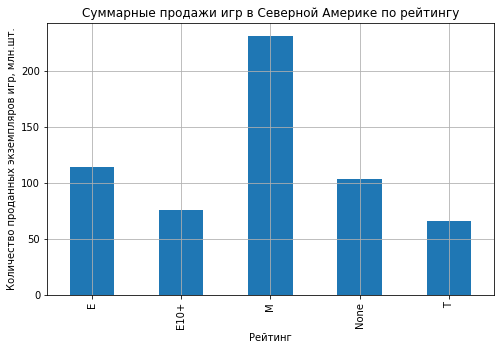

In [46]:
rating_data.plot(x='rating',
                 y='na_sales', 
                 legend=False,
                 kind='bar',
                 figsize=(8, 5),
                 grid=True,
                 title=('Суммарные продажи игр в Северной Америке по рейтингу'))
plt.ylabel('Количество проданных экземпляров игр, млн.шт.')
plt.xlabel('Рейтинг')

Text(0.5, 0, 'Рейтинг')

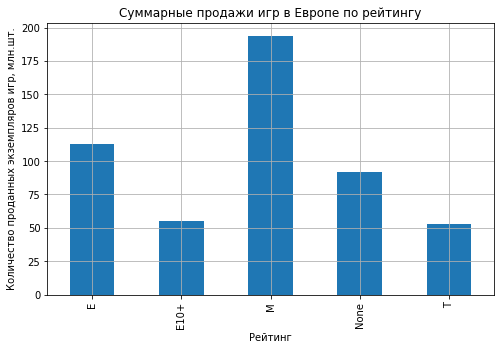

In [47]:
rating_data.plot(x='rating',
                 y='eu_sales', 
                 legend=False,
                 kind='bar',
                 figsize=(8, 5),
                 grid=True,
                 title=('Суммарные продажи игр в Европе по рейтингу'))
plt.ylabel('Количество проданных экземпляров игр, млн.шт.')
plt.xlabel('Рейтинг')

Text(0.5, 0, 'Рейтинг')

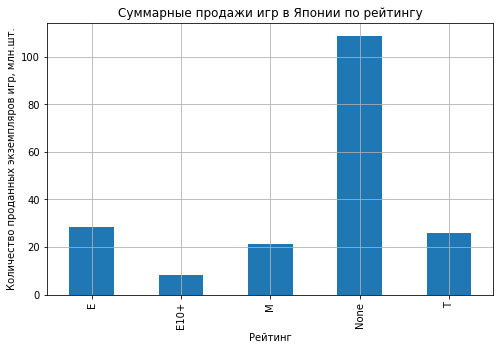

In [48]:
rating_data.plot(x='rating',
                 y='jp_sales', 
                 legend=False,
                 kind='bar',
                 figsize=(8, 5),
                 grid=True,
                 title=('Суммарные продажи игр в Японии по рейтингу'))
plt.ylabel('Количество проданных экземпляров игр, млн.шт.')
plt.xlabel('Рейтинг')

Выводы:
- также, как и с жанром, видим, что в Северной Америке и Европпе очень схожие ситуации. Самые большие продажи у игр с рейтингом M (17+), а самые маленькие - у E10+ (10+) и T (13+);
- в Японии самые большие продажи у игр с рейтингом E (0+), а самые маленькие - у E10+ (10+), причем игры с рейтингом T (13+) имеют больше продаж, чем у игр с рейтингом M (17+). Однако, для большей части игр рейтинг составлен не был.

## Шаг 5. Проперка гипотез

### Гипотеза: средние пользовательские рейтинги платформ XOne и PC одинаковые

Проверку будем проводить за актуальный приод, с уровнем статистической значимости 0,05. Для проверки гипотезы примем:
- нулевая гипотеза - средние оценки пользователей XOne и PC одинаковые;
- альтернативная гипотеза - средние оценки пользователей XOne и PC неравны.

In [49]:
# выборки оценок пользователей по платформам
user_score_xone = current_data[current_data['platform']=='XOne']['user_score'].dropna()
user_score_pc = current_data[current_data['platform']=='PC']['user_score'].dropna()

print('Размер выборки оценок пользователей для XOne:', user_score_xone.shape[0])
print('Размер выборки оценок пользователей для PC:', user_score_pc.shape[0])

Размер выборки оценок пользователей для XOne: 182

Размер выборки оценок пользователей для PC: 206


Видим, что выбрки имеют несколько сотен значений. Поэтому согласно центральной предельной теореме считаем, что выборочные средние распределены нормально. Кроме того, данные выборки не зависят друг от друга, поэтому можем применить t-тест с расчетом дисперсии. Расчитаем p-value и если оно окажется меньше уровня статистической значимости, отвергнем нулевую гипотезу в пользу альтернативной.

In [50]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(user_score_xone, user_score_pc, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912

Не получилось отвергнуть нулевую гипотезу


Из чего делаем вывод, что с большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.

### Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

Также, проверку будем проводить за актуальный приод, с уровнем статистической значимости 0,05. Для проверки гипотезы примем:
- нулевая гипотеза - средние оценки пользователей жанров Action и Sports одинаковые;
- альтернативная гипотеза - средние оценки пользователей жанров Action и Sports неравны.

In [51]:
# выборки оценок пользователей по жанрам
user_score_action = current_data[current_data['genre']=='Action']['user_score'].dropna()
user_score_sports = current_data[current_data['genre']=='Sports']['user_score'].dropna()

print('Размер выборки оценок пользователей для Action:', user_score_action.shape[0])
print('Размер выборки оценок пользователей для Sports:', user_score_sports.shape[0])

Размер выборки оценок пользователей для Action: 523

Размер выборки оценок пользователей для Sports: 194


Видим, что выбрки имеют несколько сотен значений. Поэтому согласно центральной предельной теореме считаем, что выборочные средние распределены нормально. Кроме того, данные выборки не зависят друг от друга, поэтому можем применить t-тест с расчетом дисперсии. Расчитаем p-value и если оно окажется меньше уровня статистической значимости, отвергнем нулевую гипотезу в пользу альтернативной.

In [52]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.989458066467418e-20

Отвергаем нулевую гипотезу


Из чего делаем вывод, что с большой долей вероятности средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия.

## Общий вывод

В данном проекте были выполнены следующие задачи:
- открыт файл с данными и изучена общая информация;
- проведена предобработка данных;
- проведен исследовательский анализ;
- составлен портрет пользователя каждого региона;
- проверены гипотезы.

В ходе предобработки данных было выявлено:
- пропуски в столбцах name, year_of_release и genre могли произойти по причине ошибок в чтении/записи данных при работе с базой данных, при парсинге, или человеческий фактор;
- пропуски в  столбцах critic_score, user_score и rating могли произойти по вышеописанным причинам, а также по причине того, что для некоторых игр оценки не проводились и рейтинг не составлялся.

При проведении исследовательского анализа были сделаны следущие выводы:
- количество выпущенных игр постепенно росло примерно с начала 90-х, скорее всего ввиду развития технологий, позволяющих создавать новые платформы, а так же развития и увеличения мощностей "железа". Ввиду этого, рынок начал развиваться вплоть до конца "нулевых", после чего произошел спад в 2 раза, что можно объяснить конкуренцией, из-за которой производство игр на некоторых несильно распространенных платформах стало нерентабельным, а также развитием игр на смартфоны;
- для прогнозирования на 2017 год логично взять интервал от 2012 до 2016 года включительно, так как на данном интервале отностильно стабильные показания количества выпущенных игр, а следовательно факторы развития технологий в прошлом не должны исказить прогноз;
- в среднем "срок жизни" платформы составляет 10-12 лет, после чего на нее перестают выпускать игры;
- **самыми потенциально прибыльными платформами для 2017 года являюся PS4 и XOne. Можно еще рассмотреть PC как платформу, но расчитывать на юольшие продажи на данное платформе, по сравнению с PS4 и XOne не стоит. По остальным платформам ожидается спад продаж;**
- глобальные продажи игр по платформам PS4 и XOne примерно равны и распределены примерно одинаково;
- если не брать в расчет платформы, где продаж очень мало (DS, Wii, PSP), **продажи игр и оценки пользователей и критиков коррелируют слабо.** Согласно диаграмме рассеяния продаж игр от оценок критиков,  корреляция начинает проявляться только тогда, когда оценки критиков превышают 50 баллов, но тем не менее, есть множество игр с высокими оценками, но низкими продажами. С оценками пользователей ситуация аналогичная;
- **по количеству игр на глобальном рынке с большим отрывом лидирует жанр Action. Самые прибыльные жанры с точки зрения проданных копий - Action, Shooter, Role-Playing и Sport (в порядке уменьшения). Наибольшей популярностью пользуются игры с предположительно несложным, но динамичным геймплеем.**

При составлении портрета пользователей по регионам были сделаны следующие выводы:
- в Северной Америке примерно в равных долях преоблдают продажи игр на платформы от Microsoft (XBox) и Sony (PlayStation). При этом продажи PS4 на 17% превосходят XOne. В Европе большуя часть занимают платформы от Sony. Лидирует платформа PS4, которая занимает чуть больше трети всего рынка. Продажи PS4 на 174% превосходят XOne. В Японии половину рынка занимает 3DS, а если рассматривать наиболее прибыльные платформы по глобальным продажам, то XOne вообще не входит в топ-5 продаж Японии;
- в Северной Америке и Европе жанры Action, Shooter и Sport занимают большую часть продаж (так же как и для глобального рынка. В Японии большую часть продаж занимает Role-Playing, а затем Action. Жанры Shooter и Sport в топ-5 жанров Японии отсутствуют. Данное различие распределений обусловлено сильным различием между культурой Японии и Европы с Северной америкой.
- в Северной Америке и Европпе самые большие продажи у игр с рейтингом M (17+), а самые маленькие - у E10+ (10+) и T (13+). В Японии самые большие продажи у игр с рейтингом E (0+), а самые маленькие - у E10+ (10+), причем игры с рейтингом T (13+) имеют больше продаж, чем у игр с рейтингом M (17+). Однако, для большей части игр рейтинг составлен не был.

При проверке гипотез были сделаны следующие выводы:
- с большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий;
- с большой долей вероятности средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия.